In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np
np.random.seed(10)
(x_img_train, y_label_train), (x_img_test, y_label_test) = mnist.load_data()


In [2]:
x_img_train=x_img_train.reshape(60000,28,28,1)
x_img_test=x_img_test.reshape(10000,28,28,1)
x_img_train_normalize = x_img_train.astype('float32') / 255
x_img_test_normalize = x_img_test.astype('float32') / 255
from tensorflow.keras.utils import to_categorical
y_label_train_Onehot = to_categorical(y_label_train)
y_label_test_Onehot = to_categorical(y_label_test)

In [3]:
x_img_train_normalize.shape

(60000, 28, 28, 1)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Activation, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPool2D, ZeroPadding2D

In [5]:
model = Sequential()
model.add(Conv2D(32, (5,5), activation='relu', input_shape=[28, 28, 1]))
model.add(Conv2D(64, (5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
 
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 64)        51264     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0         
_________________________________________________________________
dropout (Dropout)            (None, 6400)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               819328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

第1-4行代码导入keras中的模型、层、损失函数、优化器。
第6行代码使用keras.model库的Sequential方法实例化模型对象；
第7、8行代码是模型中添加卷积层；
第9行代码是模型中添加最大池化层；
第10行代码是模型中的数据矩阵展平；
第11行代码是模型中添加dropout操作；
第12行代码是模型中添加全连接层；
第13行代码是模型中添加dropout操作；
第14行代码是模型中添加全连接层，且使用relu作为激活函数，即最终分类结果；
第16-18行代码为模型指定损失函数，优化器，评判指标。

In [6]:
batch_size = 100
epochs = 10
train_history=model.fit(x_img_train_normalize, y_label_train_Onehot,
         batch_size=batch_size,
         validation_split=0.2,
         epochs=epochs,verbose=1)

Epoch 1/10
480/480 [==============================] - 64s 134ms/step - loss: 0.2519 - accuracy: 0.9216 - val_loss: 0.0617 - val_accuracy: 0.9817
Epoch 2/10
480/480 [==============================] - 63s 131ms/step - loss: 0.0930 - accuracy: 0.9727 - val_loss: 0.0463 - val_accuracy: 0.9864
Epoch 3/10
480/480 [==============================] - 62s 129ms/step - loss: 0.0702 - accuracy: 0.9798 - val_loss: 0.0395 - val_accuracy: 0.9887
Epoch 4/10
480/480 [==============================] - 62s 129ms/step - loss: 0.0581 - accuracy: 0.9829 - val_loss: 0.0338 - val_accuracy: 0.9907
Epoch 5/10
480/480 [==============================] - 62s 129ms/step - loss: 0.0487 - accuracy: 0.9852 - val_loss: 0.0384 - val_accuracy: 0.9890
Epoch 6/10
480/480 [==============================] - 63s 131ms/step - loss: 0.0443 - accuracy: 0.9861 - val_loss: 0.0303 - val_accuracy: 0.9911
Epoch 7/10
480/480 [==============================] - 65s 135ms/step - loss: 0.0412 - accuracy: 0.9876 - val_loss: 0.0303 - val_ac

In [7]:
loss, accuracy = model.evaluate(x_img_train_normalize, y_label_train_Onehot, verbose=1)
print('train data loss:%.4f accuracy:%.4f' %(loss, accuracy))
loss, accuracy = model.evaluate(x_img_test_normalize, y_label_test_Onehot, verbose=1)
print('test data loss:%.4f accuracy:%.4f' %(loss, accuracy))

1875/1875 [==============================] - 12s 7ms/step - loss: 0.0129 - accuracy: 0.9962
train data loss:0.0129 accuracy:0.9962
313/313 [==============================] - 2s 6ms/step - loss: 0.0239 - accuracy: 0.9931
test data loss:0.0239 accuracy:0.9931


In [8]:
def show_train_hitory(train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train_History')
    plt.ylabel('train')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
show_train_hitory('accuracy', 'val_accuracy')
show_train_hitory('loss', 'val_loss')

NameError: name 'plt' is not defined

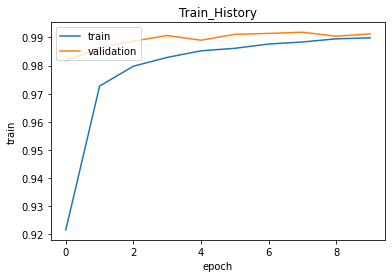

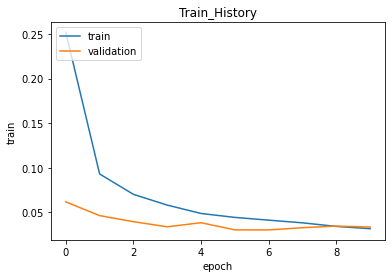

In [10]:
import matplotlib.pyplot as plt
def show_train_hitory(train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train_History')
    plt.ylabel('train')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
show_train_hitory('accuracy', 'val_accuracy')
show_train_hitory('loss', 'val_loss')

In [12]:
prediction = model.predict_classes(x_img_test_normalize)


In [13]:
import pandas as pd
pd.crosstab(y_label_test.reshape(-1),
            prediction,
            rownames=['label'],
            colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,977,0,0,0,0,0,2,1,0,0
1,0,1133,1,1,0,0,0,0,0,0
2,1,1,1028,0,0,0,0,2,0,0
3,0,0,1,1006,0,2,0,0,1,0
4,0,0,0,0,977,0,4,0,0,1
5,1,0,0,4,0,884,2,1,0,0
6,2,3,0,0,1,1,951,0,0,0
7,0,2,5,0,1,0,0,1018,1,1
8,1,1,1,1,0,1,0,1,966,2
